# Support Vector Machines - Classification

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df=pd.read_csv("diabetes.csv")

LinearRegression icin de kullandigimiz dengesiz bir data seti. SVM modelini de kullanip sonuclarimiz uyusuyor mu diye test edecegiz.

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [5]:
df.shape

(768, 9)

## Exploratory Data Analysis and Visualization

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [8]:
df.Outcome.value_counts()  

# Unbalance bir surum olup olmadigina skorlarimiza bakarak karar verecegiz.

0    500
1    268
Name: Outcome, dtype: int64

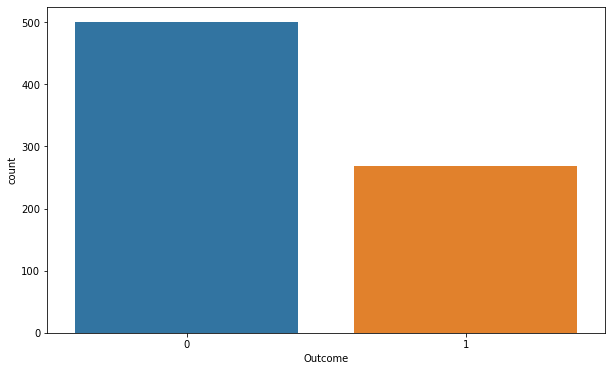

In [9]:
sns.countplot(df.Outcome);

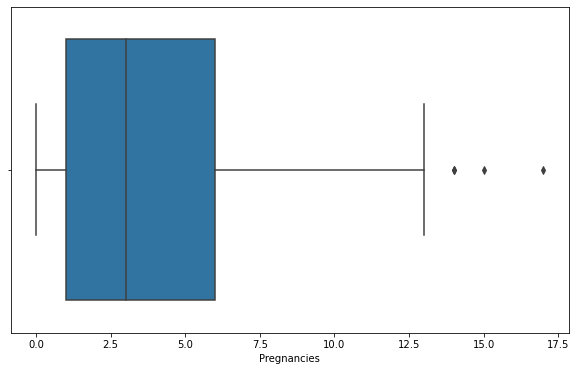

In [10]:
sns.boxplot(df.Pregnancies);

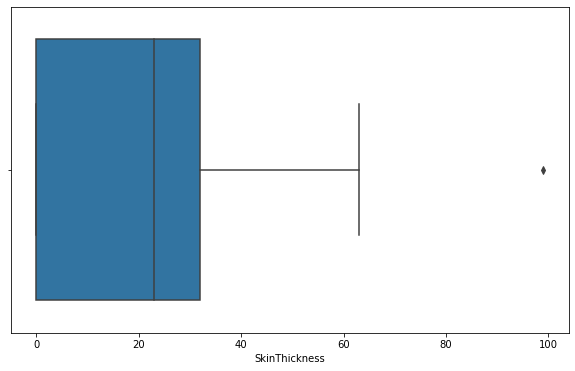

In [11]:
sns.boxplot(df.SkinThickness);

In [12]:
df=df[df.SkinThickness<70]

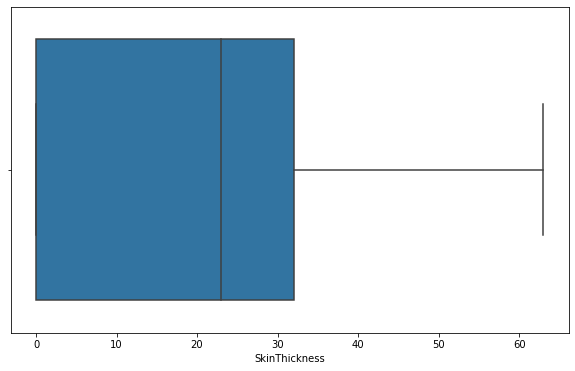

In [13]:
sns.boxplot(df.SkinThickness);

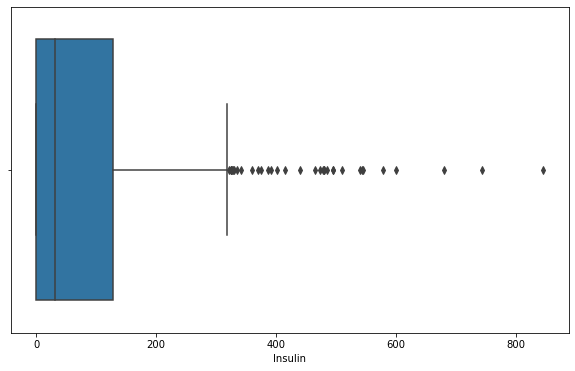

In [14]:
sns.boxplot(df.Insulin);

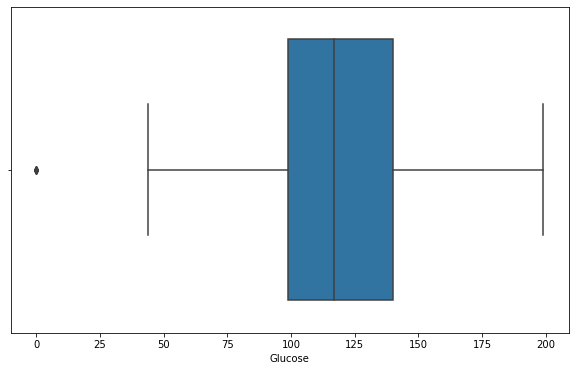

In [15]:
sns.boxplot(df.Glucose);

In [16]:
df=df[df.Glucose>0]

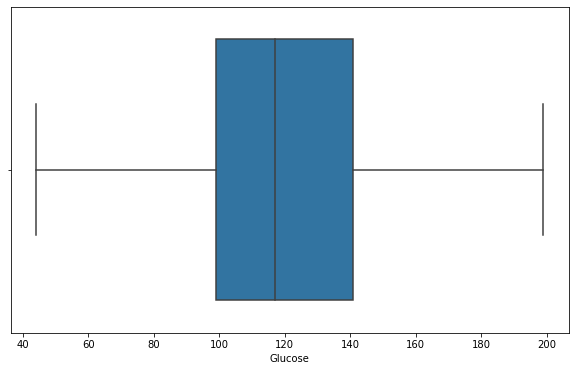

In [17]:
sns.boxplot(df.Glucose);

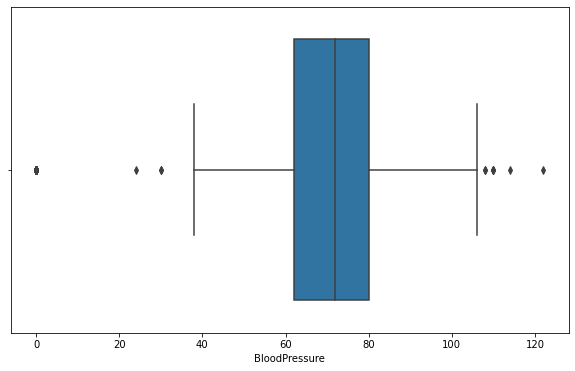

In [18]:
sns.boxplot(df.BloodPressure);

In [19]:
df=df[df.BloodPressure>35]

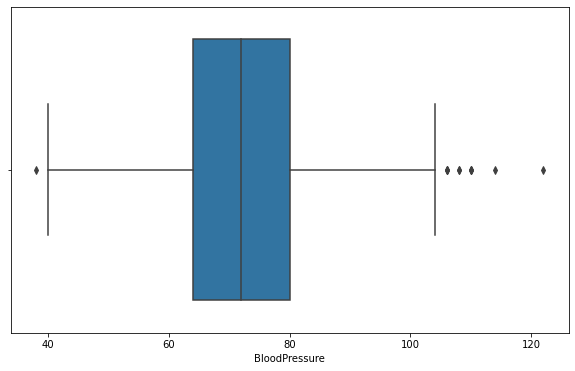

In [20]:
sns.boxplot(df.BloodPressure);

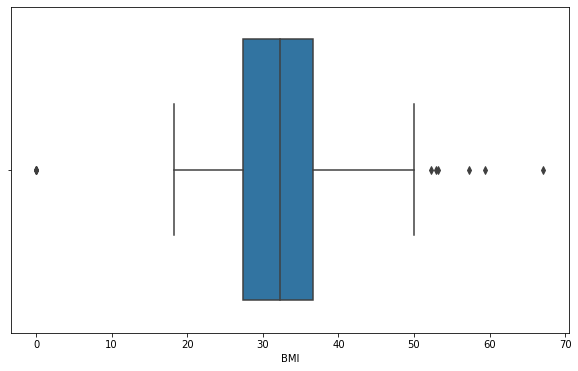

In [21]:
sns.boxplot(df.BMI);

In [22]:
df=df[df.BMI>0]

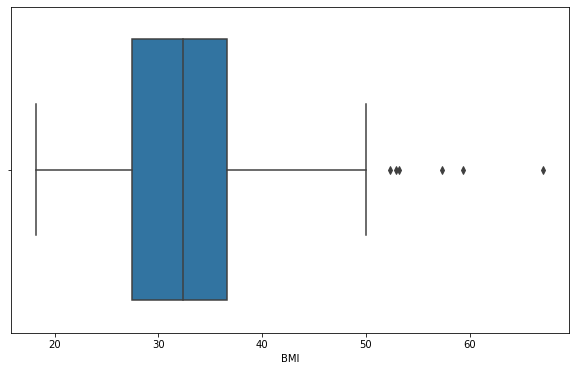

In [23]:
sns.boxplot(df.BMI);

In [24]:
df.shape

(720, 9)

In [25]:
df.Outcome.value_counts()

0    473
1    247
Name: Outcome, dtype: int64

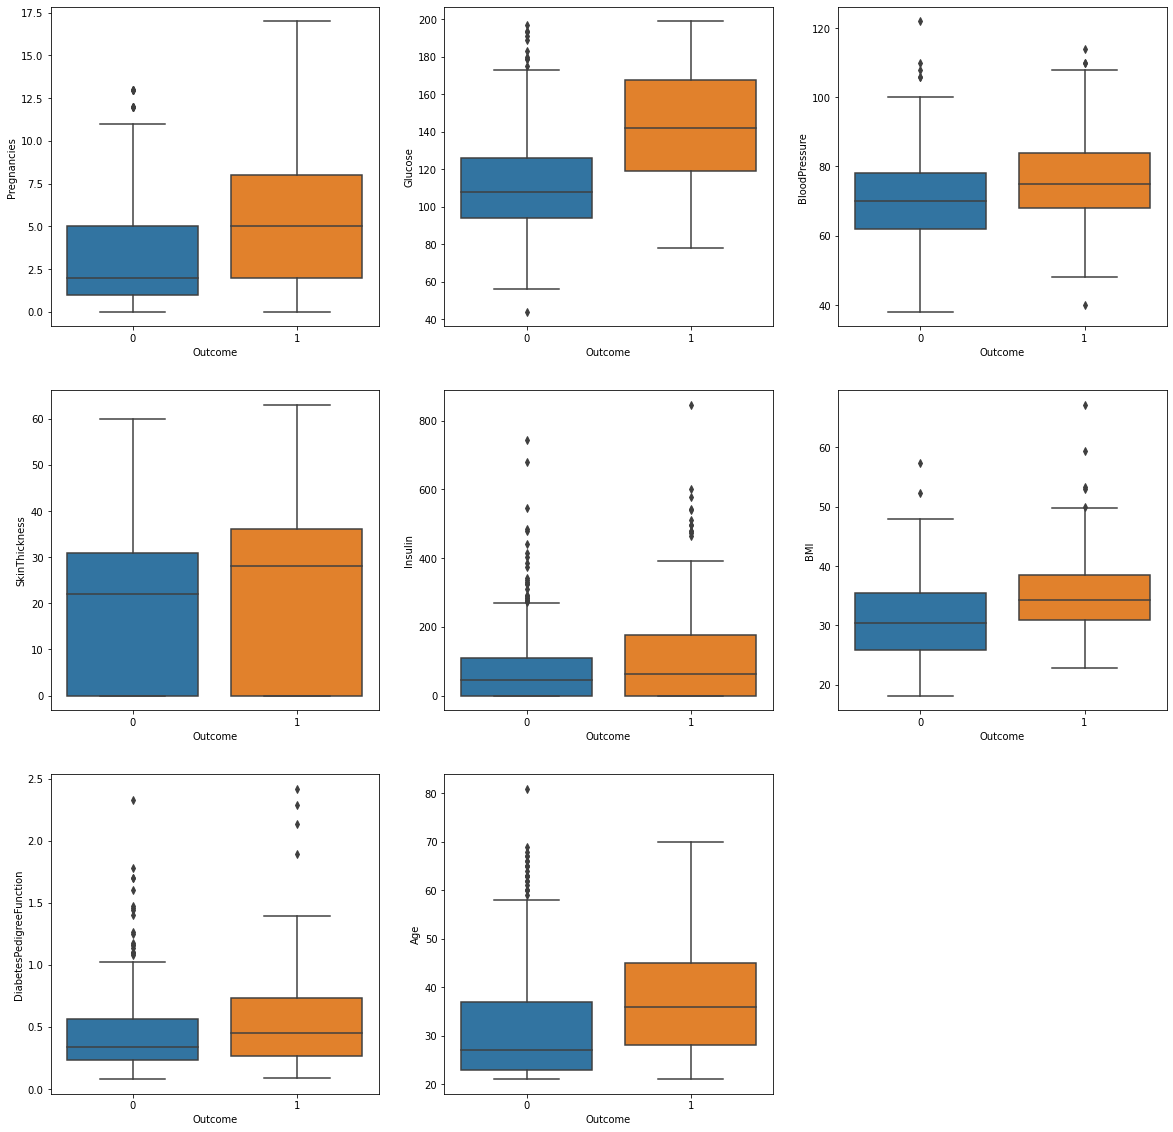

In [26]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)

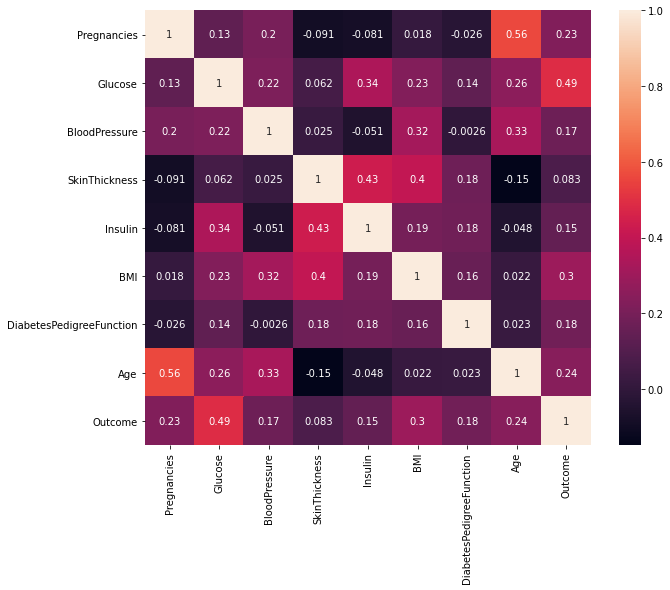

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

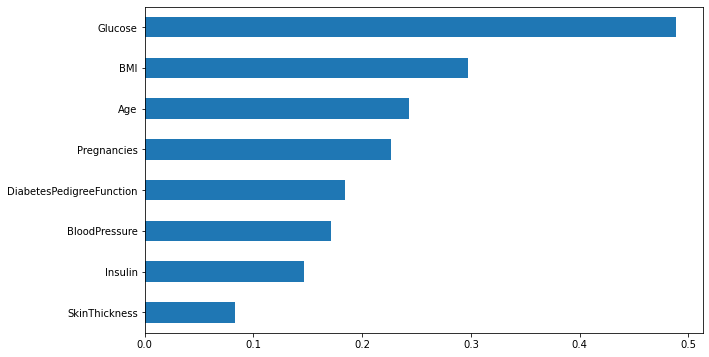

In [28]:
# df.corr()
# df.corr()["Outcome"].sort_values().plot.barh()
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh();

In [ ]:
sns.pairplot(df, hue = "Outcome");

## Train | Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

Datamiz dengesiz oldugu icin stratify=y' yi belirttik.

## Modelling and Model Performance

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

Scale edilmis data ile edilmemis data arasindaki farki gorelim :

### Without Scalling

In [ ]:
svm_model = SVC(random_state=42)

In [ ]:
svm_model.fit(X_train, y_train)

In [ ]:
eval_metric(svm_model, X_train, y_train, X_test, y_test)

# Cross Validate

In [ ]:
from sklearn.model_selection import cross_validate

model = SVC(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

Scale edilmemis datada, Cross Validate isleminden sonra recall ve f1 skorlarimiz baya dusuk cikti.

### With Scalling

Bundan sonra scale islemi uygulanacak butun datalarda 'pipeline' metodunu kullanacagiz ki CrossValidate ve GridSearch' de olusacak data leakage sorununu onleyelim:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

In [ ]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# Cross Validate

Cross Validate yaparken mutlaka pipe_modeli sifirlamak gerekiyor :

In [ ]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]    # 1 classina ait skorlar :

Scale edilmis data ile skorlarimiz daha iyi sonuc verdi.

!!!!!! KNN ve SVM modelde scale islemi mutlaka yapilmali !!!!!!

CrossValidate sonucu cikan degerler onceden aldigim tek seferlik skorlar ile tutarli degil. Skorlarimiz dustu, demek ki datanin iyi bir yerine denk gelmisiz. Bu durumu GridSearch ile duzeltmeye calisalim :

### With Best Parameters (GridsearchCV)

In [ ]:
from sklearn.model_selection import GridSearchCV

Pipeline icin degiskene atayacagimiz degerlerin Pipeline formatina uygun olmasi gerekiyordu. Hangi formatta yazmamiz gerektigini asagidaki kod ile gorebiliriz :

In [ ]:
svm_model_grid.get_params

In [ ]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear']}

In [ ]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, class_weight="balanced", random_state=42))]
pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model, param_grid, scoring="recall", cv=10)

Datamiz dengesiz oldugu icin class_weight="balanced" operations icine verdik. Bunu param_grid' in icine tanimlamadik cunku o zaman islem maliyeti artiriyor.

In [ ]:
svm_model_grid.fit(X_train, y_train)

In [ ]:
svm_model_grid.best_params_

En iyi gamma degeri 0.3 yani sinir deger oldugu icin tekrar yeni bir aralik belirlenip bakilabilir.

In [ ]:
pd.DataFrame(svm_model_grid.cv_results_)

In [ ]:
svm_model_grid.best_index_    

# En iyi skoru 14. index vermis.

In [ ]:
svm_model_grid.best_score_

GridSearch isleminden sonra test set ve train setindeki sonuclarin birbiri ile dengeli oldugunu goruyoruz :

In [ ]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

GridSearch islemi sonucu elde ettigimiz parametreleri kullanarak tekrar CrossValidate islemi yapalim :

In [ ]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(C= 0.05, gamma= 0.3, kernel= 'rbf', probability=True, 
                                                        class_weight="balanced", random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

Yukaridaki isleme gerek yok. Yani GridSearch sonrasi yeni belirlenen parametrelere gore tekrar bir CrossValidate islemi yapmamiza gerek yok.

## Overall performance of the model

In [ ]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

Dengesiz bir datasetimiz oldugu icin precision_recall' a bakiyoruz :

In [ ]:
plot_precision_recall_curve(svm_model_grid, X_test, y_test);

Asagidaki y_pred_proba degerlerine gore 0.5 treshold  degerinin altinda kalan degerler 0 sinifina, ustunde kalanlar 1 sinifina gidecek ama acaba bizim icin daha iyi skor veren bir treshold degeri var mi asagida buna bakacagiz :

In [ ]:
y_pred_proba[:,1]   

## Finding Best Threshold for max recall score  (Modelin tahmin etme skoru tutarli hale gelir.)

In [ ]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, random_state=42))]
svc_basic_model = Pipeline(steps=operations)    # Modeli sifirladik

probability=True -----> Modelimizin precision_recall_curve' u cizebilmesi icin bu parametreyi mutlaka 'True' yapmaliyiz. Asagidaki decision_function' a gore SVM modelde olusturulan margine gore negatif olanlari 0 sinifina, pozitif olanlari 1 sinifina atar. Sayisal degerler ise ortadaki best hyperline' a olan uzakligi ifade eder. 'probability=True' parametresi bu uzakliklari olasiliklara cevirir ve datanin hangi sinifa gidecegini belirler. 

ROC-AUC ve precision_recall_curve olasiliklara dayanarak cizim yaptiklari icin de 'probability=True' mutlaka belirtilip degerler olasiliga cevrilmelidir.

In [ ]:
svm_model.decision_function(X_test)

In [ ]:
svc_basic_model.fit(X_train, y_train)    

In [ ]:
plot_precision_recall_curve(svc_basic_model, X_train, y_train);    

# !!!!! best_treshold bulunurken mutlaka train setindeki skorlar kullanilir.Testi kullanirsak kopye ceker, sonuclar iyi cikar. !!!!!

In [ ]:
y_pred_proba = svc_basic_model.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba[:,1])

precision_recall_curve' de best_treshold f1 score' a gore belirlenir. Recall' un max oldugu ama Precision' un da olabildigince en dengeli oldugu noktayi secmemiz gerekiyor. Boylece en iyi f1 skoru, dolayisiyla da best_treshold' u bulmus oluruz.

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [ ]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

Optimal treshold degerimiz default deger olan 0.5 yerine 0.38 cikti. Artik modelimizde bu optimal_treshold' u kullanabiliriz.

In [ ]:
y_pred2 = pd.Series(svm_model_grid.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [ ]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

Yukaridaki skorlarin anlami : Recall' un Precision ile en dengeli ve en yuksek oldugu deger 0.80' dir.

In [ ]:
y_train_pred2 = pd.Series(svm_model_grid.predict_proba(X_train)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [ ]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(C= 0.05, gamma= 0.3, kernel= 'rbf', probability=True, 
                                                        class_weight="balanced",random_state=42))]
model = Pipeline(steps=operations)
CV(10, model, X_train, y_train, optimal_threshold)

Simdiye kadar elde ettigimiz tum skorlara bakarsak; f1 degerimiz cok degismedi. Bizim amacimiz Recall skorunu yukseltmek, Precision skorunu cok dusurmeden dengeli bir sekilde bunu yapabilmekti. Haliyle bu iki deger birbirini dengelemeye calisirken f1 skorumuzda cok buyuk degisimler olmadi.

Bu skorlara bakarak LogisticRegression modeldeki skorlarimizin daha yuksek oldugunu degerlendirebiliriz.